<a href="https://colab.research.google.com/github/aasr-1001/Datathon/blob/main/Datathon_FeatureEngineering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# mount drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [19]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

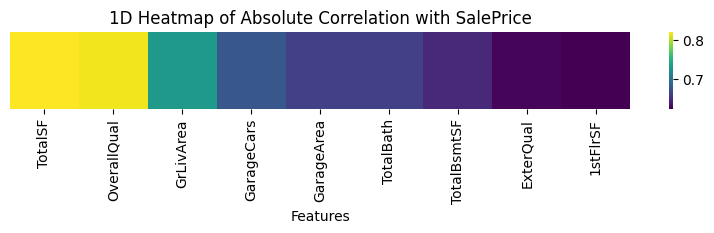

In [18]:
data=pd.read_csv("/content/drive/MyDrive/train_processed.csv")

# Faeture Engineering

file_path = "/content/drive/MyDrive/train_processed.csv"
df = pd.read_csv(file_path)

correlation = df.corr()["SalePrice"].abs().sort_values(ascending=False)
top_features = correlation[1:10]


plt.figure(figsize=(10, 1))
heatmap_data = pd.DataFrame(top_features).T
sns.heatmap(heatmap_data, cmap="viridis", cbar=True, annot=False)
plt.title("1D Heatmap of Absolute Correlation with SalePrice")
plt.yticks([])
plt.xlabel("Features")
plt.show()


In [20]:
# HANDLING SKEWED DATA


selected_features = top_features.index.tolist()
X = df[selected_features]
y = df["SalePrice"]

skew_before = X.skew().sort_values(ascending=False)

# Handling skewed data using PowerTransformer (Yeo-Johnson)
skew_handler = PowerTransformer(method='yeo-johnson')
X_skew_corrected = skew_handler.fit_transform(X)
X_corrected_df = pd.DataFrame(X_skew_corrected, columns=selected_features)


skew_after = X_corrected_df.skew().sort_values(ascending=False)

skew_change = pd.DataFrame({
    "Skew Before": skew_before,
    "Skew After": skew_after
})
skew_change["Skew Reduced"] = (abs(skew_change["Skew Before"]) - abs(skew_change["Skew After"])) > 0.5

affected_columns = skew_change[skew_change["Skew Reduced"]]
print("Columns with significant skew correction:\n", affected_columns)

Columns with significant skew correction:
            Skew Before  Skew After  Skew Reduced
1stFlrSF      0.664134   -0.002069          True
ExterQual    -1.830265   -0.622031          True
GrLivArea     0.593556   -0.007095          True
TotalSF       0.626136    0.016638          True


In [21]:

original_csv_path = "/content/drive/MyDrive/train_processed.csv"
output_csv_path = "/content/drive/MyDrive/train_processed_skew_corrected.csv"

df_original = pd.read_csv(original_csv_path)


for col in X_corrected_df.columns:
    if col != "SalePrice":
        df_original[col] = X_corrected_df[col]

df_original.to_csv(output_csv_path, index=False)
print(f"Skew-corrected dataset saved to: {output_csv_path}")


Skew-corrected dataset saved to: /content/drive/MyDrive/train_processed_skew_corrected.csv
